## Marvel & DC Live-Action Films Analysis by Ammar Altalibi

Uses MARVEL vs. DC - IMDB & ROTTEN TOMATOES dataset from Kaggle

Link to dataset: 
https://www.kaggle.com/jcraggy/marvel-vs-dc-imdb-rotten-tomatoes


This is my exploratory data analysis of Marvel vs DC live action films. The notebook is divided into 3 major sections, with each section divided into subsections based on what questions I have. For the Data Analysis section, I included my thoughts and observations under each graph as well.

## Load Packages and Dataset

We need to first setup our notebook and load and open our dataset. We do this by performing these steps:
- Import libraries
- Mount Google Drive
- Load dataset using Pandas

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Mount the Google Drive to avoid maunally uploading files to Google Colab
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Read the csv file into a dataframe
mdc = pd.read_csv('/content/gdrive/MyDrive/Datasets/mdc.csv', sep = ',', encoding = 'latin-1')

# Display the first 5 rows
mdc.head()

,Unnamed: 0,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
0,1,Captain America,1944,"Action, Adventure, Sci-Fi",244,Approved,5.5,844,0,Elmer Clifton,"Elmer Clifton,Dick Purcell,Lorna Gray,Lionel A...",Superhero Captain America battles the evil for...,"Find one of these old serials, friend. They're...",0,1,82,250,MARVEL,1
1,2,Howard the Duck,1986,"Action, Adventure, Comedy",110,PG,4.7,44073,16300000,Willard Huyck,"Willard Huyck,Lea Thompson,Jeffrey Jones,Tim R...",A sarcastic humanoid duck is pulled from his h...,"While it has its moments, Howard the Duck suff...",13,78,38,50000,MARVEL,2
2,3,Blade,1998,"Action, Horror, Sci-Fi",120,R,7.1,251243,70090000,Stephen Norrington,"Stephen Norrington,Wesley Snipes,Stephen Dorff...","A half-vampire, half-mortal man becomes a prot...","Though some may find the plot a bit lacking, B...",55,103,78,250000,MARVEL,3
3,4,X-Men,2000,"Action, Adventure, Sci-Fi",104,PG-13,7.4,580354,157300000,Bryan Singer,"Bryan Singer,Patrick Stewart,Hugh Jackman,Ian ...",In a world where mutants (evolved super-powere...,"Faithful to the comics and filled with action,...",82,174,83,250000,MARVEL,4
4,5,Blade II,2002,"Action, Fantasy, Horror",117,R,6.7,203813,82350000,Guillermo del Toro,"Guillermo del Toro,Wesley Snipes,Kris Kristoff...",Blade forms an uneasy alliance with the vampir...,Though Blade II offers more of what worked in ...,57,150,68,250000,MARVEL,5


## Data Exploration

Now we can begin exploring the data. After loading the data, we can answer a few questions, which will give us a good idea of what kind of data we are working with, and will make further analysis much easier.

### How many rows and columns are there?

In [3]:
# Check the shape of our dataset (number of rows and columns)
print('There are',mdc.shape[0], 'rows in our dataframe')
print('There are',mdc.shape[1], 'columns in our dataframe')

There are 90 rows in our dataframe
There are 19 columns in our dataframe


### What types of data are in the dataframe? Are there any null values?

In [4]:
# Check to see the data types and if there are any null values
mdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      90 non-null     int64  
 1   title           90 non-null     object 
 2   year            90 non-null     int64  
 3   genre           90 non-null     object 
 4   runtime         90 non-null     int64  
 5   mpa_rating      90 non-null     object 
 6   imdb_rating     90 non-null     float64
 7   imdb_votes      90 non-null     int64  
 8   imdb_gross      90 non-null     int64  
 9   director        90 non-null     object 
 10  stars           90 non-null     object 
 11  description     90 non-null     object 
 12  crit_consensus  90 non-null     object 
 13  tomato_meter    90 non-null     int64  
 14  tomato_review   90 non-null     int64  
 15  tom_aud_score   90 non-null     int64  
 16  tom_ratings     90 non-null     int64  
 17  entity          90 non-null     objec

### How many films did each company produce?

In [5]:
# Count the number of films for each company
mdc.groupby('entity')[['title']].count()

,title
entity,
DC,33
MARVEL,57


### What are the means, medians, maximums, etc., of the dataset?

In [6]:
# Simple statistical analysis
mdc.describe()

,Unnamed: 0,year,runtime,imdb_rating,imdb_votes,imdb_gross,tomato_meter,tomato_review,tom_aud_score,tom_ratings,id
count,90.000000,90.000000,90.000000,90.000000,9.000000e+01,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,2006.377778,124.144444,6.552222,4.652830e+05,2.123682e+08,59.900000,266.966667,66.733333,150311.111111,45.500000
std,26.124701,14.335920,23.522192,1.271576,3.834906e+05,1.737576e+08,29.439731,144.250597,22.646179,98166.343799,26.124701
min,1.000000,1944.000000,58.000000,2.900000,8.440000e+02,0.000000e+00,0.000000,1.000000,15.000000,250.000000,1.000000
25%,23.250000,2003.250000,110.500000,5.700000,1.910570e+05,7.757250e+07,31.250000,156.250000,55.250000,50000.000000,23.250000
50%,45.500000,2011.000000,124.000000,6.900000,4.212640e+05,1.806150e+08,67.500000,277.500000,73.500000,100000.000000,45.500000
75%,67.750000,2016.000000,136.000000,7.400000,6.548668e+05,3.249725e+08,85.750000,377.250000,85.000000,250000.000000,67.750000
max,90.000000,2020.000000,244.000000,9.000000,2.369304e+06,8.583700e+08,96.000000,585.000000,95.000000,250000.000000,90.000000


In [7]:
# We can see a brief overview of the means for specific columns in order to compare the 2 companies
grpdata = mdc.groupby('entity')[['title', 'year', 'genre', 'runtime', 'imdb_rating', 'imdb_votes', 'imdb_gross', 'tomato_meter', 'tom_aud_score', 'tom_ratings', 'entity']].mean()
grpdata

,year,runtime,imdb_rating,imdb_votes,imdb_gross,tomato_meter,tom_aud_score,tom_ratings
entity,,,,,,,,
DC,2000.454545,123.454545,6.133333,407965.575758,1.608842e+08,52.454545,60.484848,131522.727273
MARVEL,2009.807018,124.543860,6.794737,498466.842105,2.421747e+08,64.210526,70.350877,161188.596491


In [8]:
# Here are the top 5 longest movies
mdc[['title','year','runtime','imdb_rating','entity']].sort_values(by = ['runtime'], ascending = False).head()

,title,year,runtime,imdb_rating,entity
0,Captain America,1944,244,5.5,MARVEL
53,Avengers: Endgame,2019,181,8.4,MARVEL
79,The Dark Knight Rises,2012,164,8.4,DC
76,Watchmen,2009,162,7.6,DC
74,Superman Returns,2006,154,6.0,DC


In [9]:
# Here are the top 5 highest rated movies based on IMDB ratings
mdc[['title','year','runtime','imdb_rating','entity']].sort_values(by = ['imdb_rating'], ascending = False).head()

,title,year,runtime,imdb_rating,entity
75,The Dark Knight,2008,152,9.0,DC
87,Joker,2019,122,8.4,DC
79,The Dark Knight Rises,2012,164,8.4,DC
53,Avengers: Endgame,2019,181,8.4,MARVEL
48,Avengers: Infinity War,2018,149,8.4,MARVEL


In [10]:
# Here are the top 5 highest rated movies based on their Tomato meter
mdc[['title','year','runtime','tomato_meter','entity']].sort_values(by = ['tomato_meter'], ascending = False).head()

,title,year,runtime,tomato_meter,entity
47,Black Panther,2018,134,96,MARVEL
53,Avengers: Endgame,2019,181,94,MARVEL
59,Superman,1978,143,94,DC
18,Iron Man,2008,126,94,MARVEL
75,The Dark Knight,2008,152,94,DC


## Data Analysis

After getting familiar with our data, we can begin analyzing the data further to find any trends, patterns, or any useful insights such as relationships.

### How are the IMDB ratings distributed?

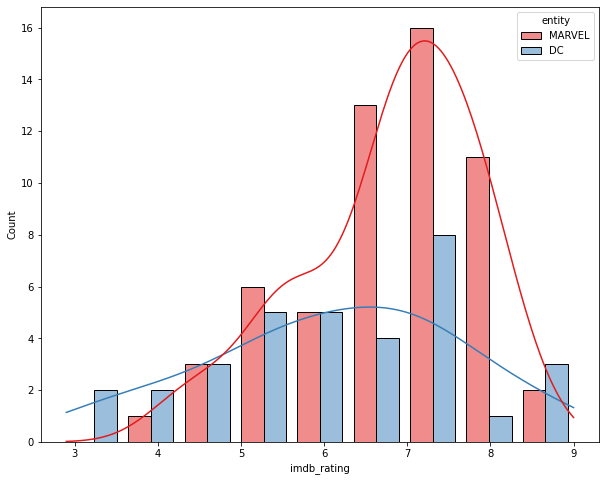

In [76]:
# Histogram that shows us how many of each IMDB rating the companies received
fig = plt.figure(figsize = (10,8))
sns.histplot(data = mdc, 
             x = 'imdb_rating', 
             kde = True, 
             hue = 'entity', 
             multiple = 'dodge', 
             shrink = 0.8, 
             palette = 'Set1');

Observations:

The IMDB ratings for Marvel films is more left-skewed, while the ratings for DC films is more normally distributed. We can also see that the majority of Marvel films recevied a 6.5-7.5 rating while DC films received around a 7.5 rating more than any other number.


---


### What is the total gross per year for each company?

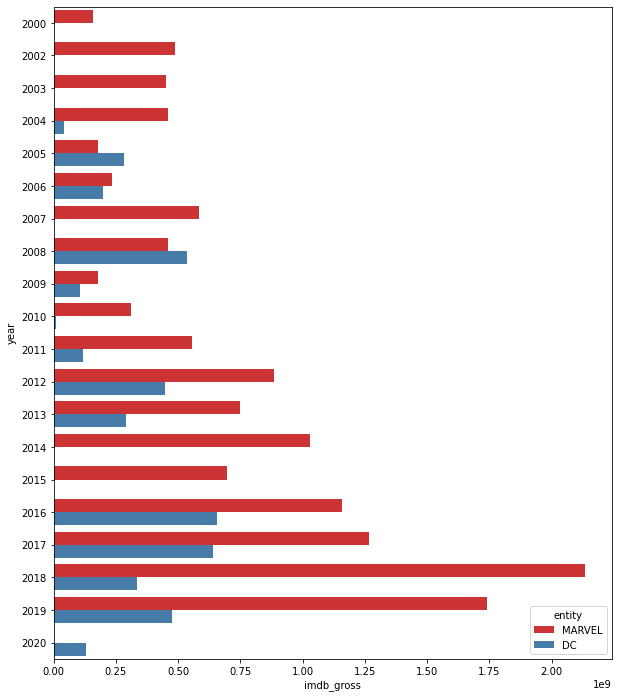

In [80]:
# Barplot showing the total domestic box office gross for each year since 2000
filterdata = mdc[mdc['year'] >= 2000]
fig = plt.figure(figsize = (10,12))
sns.barplot(data = filterdata, 
            x = 'imdb_gross', 
            y = 'year', 
            hue = 'entity', 
            ci = None, 
            estimator = sum, 
            palette = 'Set1',
            orient = 'h');

Observations:

We can see that Marvel has made a bigger profit than DC nearly every year. DC's profits are also relatively consistent, while Marvel has been slowly increasing over the last 10 years. Could this be because Marvel has been increasing the number of films each year?

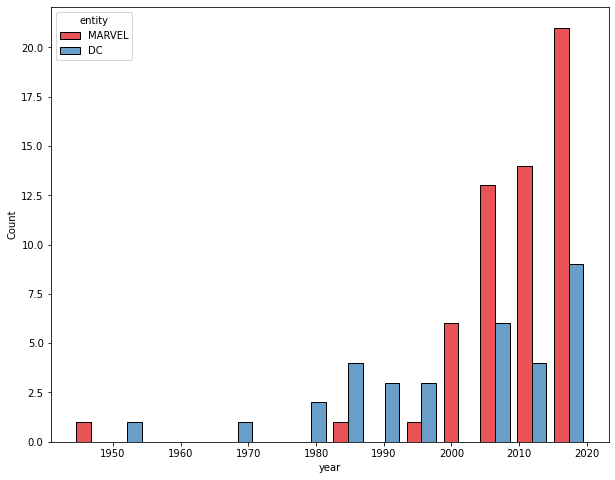

In [74]:
# This barplot displays the number of films released each year by each company
fig = plt.figure(figsize = (10,8))
sns.histplot(data = mdc, x = 'year', 
             hue = 'entity', 
             multiple = 'dodge', 
             shrink = 0.8, 
             palette = 'Set1');

Observations:

Now we can see that Marvel is in fact increasing the number of films released for the last few years, which can explain its exponential growth in revenue. This means that taking the average box office gross would be more appropriate when comparing DC to Marvel.

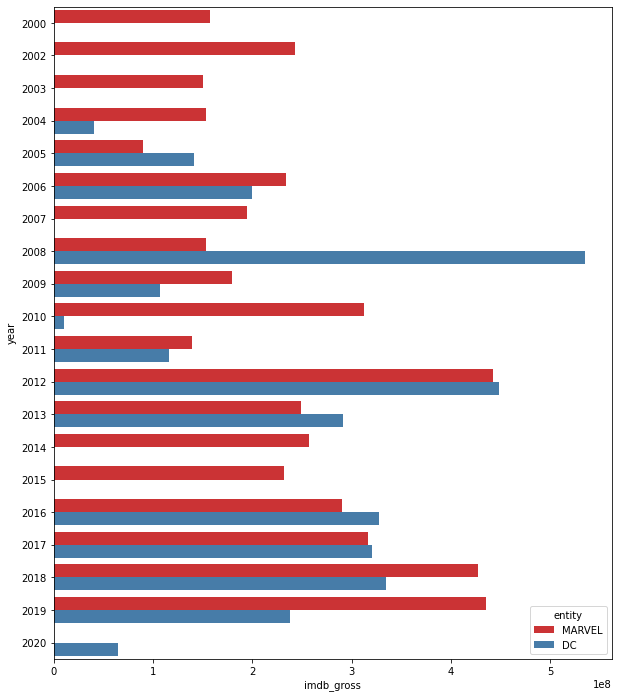

In [81]:
# This barplot compares the average domestic box office gross for each year since 2000
filterdata = mdc[mdc['year'] >= 2000]
fig = plt.figure(figsize = (10,12))
sns.barplot(data = filterdata, 
            x = 'imdb_gross', 
            y = 'year', 
            hue = 'entity', 
            ci = None, 
            palette = 'Set1',
            orient = 'h');

Observations:

On average, it seems that DC is able to compete with Marvel in terms of box office gross. If DC can increase the number of films released each year, then they could theoritically make as much profit as Marvel does.



---



### Is there a relationship between the ratings and the box office gross?

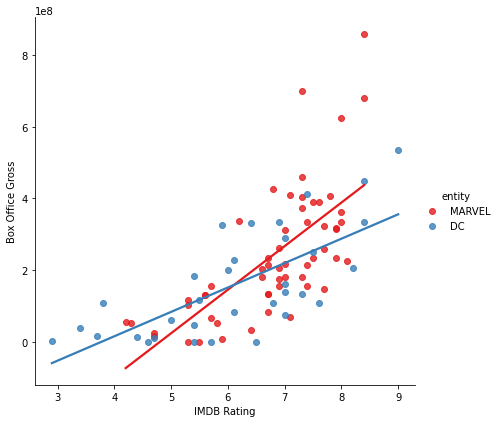

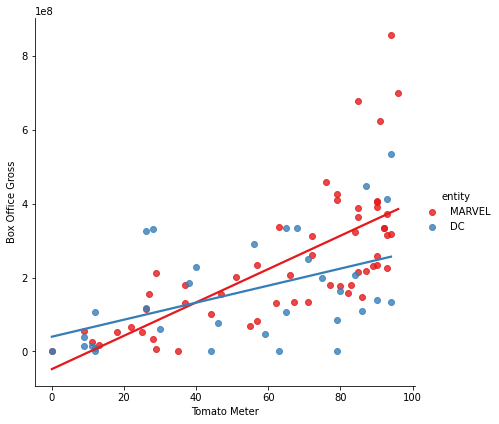

In [29]:
# Linear regression plots that show us if there is a relationship between IMDB rating and the box office gross for each movie
ax1 = sns.lmplot(data = mdc,
           x = 'imdb_rating', 
           y = 'imdb_gross', 
           ci = None, 
           hue = 'entity', height = 6, 
           palette = 'Set1');
ax1.set_axis_labels("IMDB Rating", "Box Office Gross")

# Similar plot but for the Rotten Tomatoes score and box office fross instead
ax2 = sns.lmplot(data = mdc, 
           x = 'tomato_meter', 
           y = 'imdb_gross', 
           ci = None, 
           hue = 'entity', height = 6, 
           palette = 'Set1');
ax2.set_axis_labels("Tomato Meter", "Box Office Gross")

Observations:

There seems to be a correlation between the ratings and box office gross, especially when it comes to Marvel films. We can look further into this by using Pearson Correlation Coefficients

In [45]:
# We first create a new dataframe for each company
mvl = mdc[mdc['entity'] == 'MARVEL']
dc = mdc[mdc['entity'] == 'DC']

# We then create a correlation table for each company based on the columns we want to observe
print('Pearson correlation coefficients for Marvel films')
print(mvl[['imdb_gross','imdb_rating','tomato_meter']].corr().round(3))
print('-----------------------------------------------------')
print('Pearson correlation coefficients for DC films')
print(dc[['imdb_gross','imdb_rating','tomato_meter']].corr().round(3))

Pearson correlation coefficients for Marvel films
              imdb_gross  imdb_rating  tomato_meter
imdb_gross         1.000        0.693         0.700
imdb_rating        0.693        1.000         0.891
tomato_meter       0.700        0.891         1.000
-----------------------------------------------------
Pearson correlation coefficients for DC films
              imdb_gross  imdb_rating  tomato_meter
imdb_gross         1.000        0.704         0.477
imdb_rating        0.704        1.000         0.800
tomato_meter       0.477        0.800         1.000


Observations:

From these tables, we can see that Marvel has a stronger relationship between the Rotten Tomatoes scores and box office gross, while DC has a stronger relationship with between the IMDB ratings and box office gross.



---



### Conclusions

Based on this analysis, we can conclude the following:

1. Marvel has been producing more films than DC for the last few years, and is producing films at an increasing rate
2. On average, Marvel films perform better both critically and financially
3. IMDB ratings seems to be a better indicator for gross performance for DC films, but Rotten Tomatoes is a better indicator for Marvel films.

Further analysis could find insights that support these conclusions further, or even contradict it. There are still many more methods of analysis that could be done, such as sentiment analysis for the critic consensus, and predictive modelling for gross revenue when given the rating. Thank you for reading!